# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

## Creating Recommender Systems
Today we will be creating a recommender system for User2. We will break down the data available and additionally compare their data to similair users to recommend movies they might be interested in.

Let's begin by pulling our data and importing the needed packages.

In [1]:
#Importing the needed fucnctions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing the Ratings and Movies Data Sets
ratings = pd.read_csv('Data/ratings.csv')
movies = pd.read_csv('Data/movies.csv')

In [3]:
#Confirming the Ratings were correctly imported
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
#Confirming the Ratings were correctly imported
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#Extracting the Movie Names
movies.set_index('movieId', inplace=True)

Let's now view the top ranked movies. We will avoid the sum function to avoid many movies with the multiple 1 star ratings and utilize the mean function.

In [9]:
#Locating the top movies by average rating
top_stats = ratings.groupby('movieId')['rating'].agg(['mean','count'])

#Locating the top movies that have at least 3 people voting them as the top
top_movies = top_stats[(top_stats['mean']==5) & (top_stats['count']>=2)]

#Indexing the movieId Column
top_rated = movies.loc[top_movies.index]

#Displaing the requested data
top_rated


,title,genres
movieId,,
53,Lamerica (1994),Adventure|Drama
99,Heidi Fleiss: Hollywood Madam (1995),Documentary
1151,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy
3473,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,Comedy
6442,Belle époque (1992),Comedy|Romance
6818,Come and See (Idi i smotri) (1985),Drama|War
78836,Enter the Void (2009),Drama


This ended up not working out as well as intended because we had to lower the threshold to 2 to present any data. Let's provide the sum of data now instead.

In [10]:
top_idx = ratings.groupby('movieId').sum().sort_values(by='rating', ascending=False).index
movies.loc[top_idx]

,title,genres
movieId,,
318,"Shawshank Redemption, The (1994)",Crime|Drama
356,Forrest Gump (1994),Comedy|Drama|Romance|War
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
...,...,...
160872,Satanic (2016),Horror
8236,While the City Sleeps (1956),Drama|Film-Noir
57326,In the Name of the King: A Dungeon Siege Tale ...,Action|Adventure|Fantasy


This matches a quick search online for the top movies of all time, this indicates a higher accuracy. Out of curiosity, let's check out the lowest ranked movies that actually received scores. Let's set it up for a minimun of 3 people voting on the movie for it to count.

In [11]:
#Calculate the Mean and the count of the ratings 
low_stats = ratings.groupby('movieId')['rating'].agg(['mean','count'])

#Locating the Movies with an average ratign of 1
lowest_rated = low_stats[(low_stats['mean']==1) & (low_stats['count']>=3)]

#Indexing the movieId Column
bottom_rated = movies.loc[lowest_rated.index]

#Displaying the requested data
bottom_rated

,title,genres
movieId,,
1526,Fathers' Day (1997),Comedy
2818,Iron Eagle IV (1995),Action|War
47810,"Wicker Man, The (2006)",Horror|Mystery|Thriller
125916,Fifty Shades of Grey (2015),Drama|Romance
156607,The Huntsman Winter's War (2016),Action|Adventure|Drama|Fantasy


We'll keep an eye on these movies as if they show up in later data, something is wrong. It will be a good indicator for something not working if these movies are presented. 

In [16]:
#Let's now join the two dataframes in one line (just for reference)
pd.concat([movies, ratings.groupby('movieId').sum()], axis=1).sort_values(by='rating', ascending=False)

,title,genres,userId,rating,timestamp
movieId,,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,95829.0,1404.0,3.769248e+11
356,Forrest Gump (1994),Comedy|Drama|Romance|War,101385.0,1370.0,3.861652e+11
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,90621.0,1288.5,3.492043e+11
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,85236.0,1165.5,3.502700e+11
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,85535.0,1161.0,3.200357e+11
...,...,...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN,NaN
32160,Twentieth Century (1934),Comedy,NaN,NaN,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN,NaN


## User 2 Personalization
We now will pivot into personlizing our approach to User 2.

Let's first break down User2's basic interests. We will review their movie ratings and basic numbers.

In [22]:
#Only pulling the ratings from User2
user2_ratings = ratings[ratings['userId'] == 2]

#Let's see how many ratings they left
user2_overall_ratings = user2_ratings.join(movies, on='movieId')[['movieId','title','rating']]

#Presenting every movie they rated
user2_overall_ratings

,movieId,title,rating
232,318,"Shawshank Redemption, The (1994)",3.0
233,333,Tommy Boy (1995),4.0
234,1704,Good Will Hunting (1997),4.5
235,3578,Gladiator (2000),4.0
236,6874,Kill Bill: Vol. 1 (2003),4.0
237,8798,Collateral (2004),3.5
238,46970,Talladega Nights: The Ballad of Ricky Bobby (2...,4.0
239,48516,"Departed, The (2006)",4.0
240,58559,"Dark Knight, The (2008)",4.5
241,60756,Step Brothers (2008),5.0


This user likes Step Brothers, Inside Job and Warrior the most accordign to their ratings. Complete side note, rating Interstellar at only 3 stars is an *interesting choice*.

Let's visualize User2's Ratings

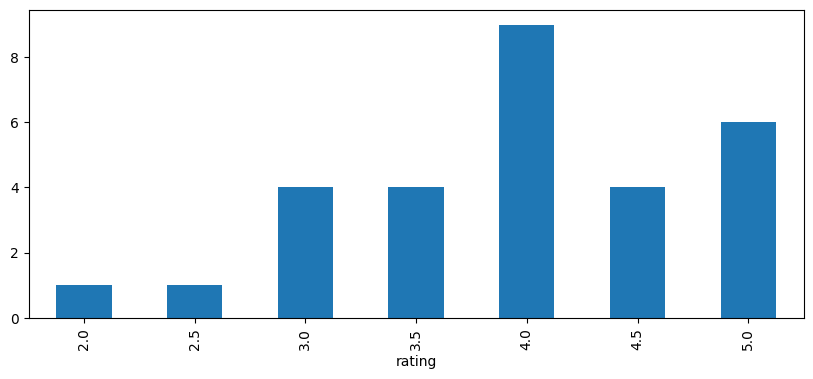

In [30]:
#Sorting the index for a more presentable X axis and provide a data set where User 2 inputted a rating.
user2_main_ratings = (user2_ratings['rating'].value_counts().sort_index())

#Plotting the 
_= user2_main_ratings.plot.bar(x='rating', figsize=(10,4))

## Collaborative Recommenders
We will be using the Euclidean, Cosine and Pearson Coefficent to relate User2 to another similar user to review what they might be interested in. We will be finding similar users and utilizing their interests to make recommendations.

First let's create a data frame that we can use. We are currently using a "long" data set (many rows but not many columns), and we will need to have a data set that is "wide" (many columns but not as many rows). This will help us narrow down the movies themselves rather than just total ratings.

In [31]:
#Creating the "wide" data set
wide = ratings.pivot(index='userId', columns='movieId', values='rating')

#Checking to make sure it was created correctly.
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Pearson Correlation
We will figure out some users with similar preferences using the Pearson Correlation (how linearly related two users are).

In [32]:
#Creating a data set that shows the linear correlation between users
cor = wide.T.corr()

#Confirming this exported correctly
cor.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,9.157371e-02,-1.597727e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-3.873468e-01,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-2.221127e-01,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,2.719480e-16,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582


Now we will review what users match user 2's ratings.

In [33]:
cor.loc[2].sort_values(ascending=False)

userId
2      1.0
341    1.0
93     1.0
143    1.0
148    1.0
      ... 
602    NaN
604    NaN
605    NaN
607    NaN
609    NaN
Name: 2, Length: 610, dtype: float64

Unfortunately this provided users that used the exact same ratings for movies rather than just finding similar users. We will keep an eye on the users 341, 93, 143 and 148 for future reference.

### Euclidean Distances
We will now review the euclidean distances that are the closest to User 2 to see which users are similarly related.

In [34]:
#Euclidean Distance calculations cannot work with missing values.
wide.fillna(-1, inplace=True)

In [38]:
#The packages needed for this calculation, and the next calculation
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import euclidean

#Quick Sanity Check
euclidean(wide.iloc[2], wide.iloc[341])

41.212862069989754

In order for us to review the best Euclidean Distances, let's create a new data frame with the distances.

In [41]:
#Creating the Square Matrix
euclidean_distances = squareform(pdist(wide, metric=euclidean))

#Creating the Data Frame
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)

In [42]:
#Confirming it worked
euclidean_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,86.239492,84.731930,96.979379,84.516271,108.083301,91.651514,84.380092,86.203248,96.969067,...,95.430603,90.288427,147.939177,91.350972,96.224997,165.230143,90.862534,126.232920,84.279298,179.904836
2,86.239492,0.000000,36.806929,74.567084,41.039615,84.777650,60.172668,41.318882,40.450587,57.295288,...,55.859198,58.423026,145.090489,52.822817,69.235107,158.923724,71.674612,124.893955,37.016888,171.373860
3,84.731930,36.806929,0.000000,73.908727,39.956226,84.584277,60.112395,40.441316,39.172695,58.150666,...,59.895743,57.701820,144.296570,51.850747,68.233057,158.848985,70.664701,124.946989,36.173194,172.971819
4,96.979379,74.567084,73.908727,0.000000,72.608539,101.847926,83.330667,74.639132,75.591005,85.743804,...,84.604964,81.455509,137.952891,81.018516,90.461318,158.726179,89.693924,131.524713,73.593478,178.462181
5,84.516271,41.039615,39.956226,72.608539,0.000000,77.479029,59.958319,33.837849,43.543082,60.274373,...,61.253571,48.383882,142.762040,47.833043,66.740168,157.171880,69.188149,122.697799,35.270384,172.935682


In [43]:
#Finding the shortest distance between User 2 and the nearest user
euclidean_df.loc[2].sort_values()

userId
2        0.000000
442     29.000000
461     30.495901
189     30.809901
508     31.488093
          ...    
448    171.200175
610    171.373860
599    185.184368
474    206.630709
414    232.408046
Name: 2, Length: 610, dtype: float64

It appears the next most similar user is 442, followed by 461, 189 and 508.

### Cosine Distance
We will not review which users are closest to user 2 based on vector distances (cosine difference).

In [44]:
#Creating the array for Cosine Differences
cosine_distances = squareform(pdist(wide, metric='cosine'))

#Creating the Data Frame for Cosine Differences
cosine_df = pd.DataFrame(cosine_distances, columns=wide.index, index=wide.index)

#Sorting the values by closest
cosine_df.loc[2].sort_values()

userId
2      0.000000
442    0.042025
461    0.046059
189    0.046957
508    0.049443
         ...   
610    0.762312
448    0.817785
599    0.936812
474    0.975777
414    1.084648
Name: 2, Length: 610, dtype: float64

It appears the next most similar user is 442, followed by 461, 189 and 508. This directly reflects the Euclidean data

## Recommendations

We first need to remove the -1 values in our data frames to ensure we can recommend the movies User 2 has not seen.

In [49]:
#Filling in the -1 values with na
wide.replace(-1, np.nan, inplace=True)

#Quick Sanity Check
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Our most similar users were 442, followed by 461, 189 and 508. Let's locate movies these users enjoyed to recommend to user 2.

In [56]:
#Reviewing Movies User 442 Rated 5 Stars, but User 2 did not rate
rated_5_by_442_not_watched_by_2 = (wide.loc[442] == 5) & (wide.loc[2].isna())
print(wide.loc[2][rated_5_by_442_not_watched_by_2])
print(wide.loc[442][rated_5_by_442_not_watched_by_2])

Series([], Name: 2, dtype: float64)
Series([], Name: 442, dtype: float64)


It appears there was no movies user 442 rated 5 stars and user 2 did not rate. Let's check the other similar users.

In [57]:
#Reviewing Movies User 461 Rated 5 Stars, but User 2 did not rate
rated_5_by_461_not_watched_by_2 = (wide.loc[461] == 5) & (wide.loc[2].isna())
print(wide.loc[2][rated_5_by_461_not_watched_by_2])
print(wide.loc[461][rated_5_by_461_not_watched_by_2])

movieId
356   NaN
Name: 2, dtype: float64
movieId
356    5.0
Name: 461, dtype: float64


In [58]:
#Reviewing Movies User 189 Rated 5 Stars, but User 2 did not rate
rated_5_by_189_not_watched_by_2 = (wide.loc[189] == 5) & (wide.loc[2].isna())
print(wide.loc[2][rated_5_by_189_not_watched_by_2])
print(wide.loc[189][rated_5_by_189_not_watched_by_2])

Series([], Name: 2, dtype: float64)
Series([], Name: 189, dtype: float64)


In [59]:
#Reviewing Movies User 508 Rated 5 Stars, but User 2 did not rate
rated_5_by_508_not_watched_by_2 = (wide.loc[508] == 5) & (wide.loc[2].isna())
print(wide.loc[2][rated_5_by_508_not_watched_by_2])
print(wide.loc[508][rated_5_by_508_not_watched_by_2])

Series([], Name: 2, dtype: float64)
Series([], Name: 508, dtype: float64)


In [61]:
#Reviewing Movies User 341 Rated 5 Stars, but User 2 did not rate (Based on Euclidean Distance)
rated_5_by_341_not_watched_by_2 = (wide.loc[341] == 5) & (wide.loc[2].isna())
print(wide.loc[2][rated_5_by_341_not_watched_by_2])
print(wide.loc[341][rated_5_by_341_not_watched_by_2])

movieId
1       NaN
59900   NaN
Name: 2, dtype: float64
movieId
1        5.0
59900    5.0
Name: 341, dtype: float64


In [70]:
#Locating the Movie Names that other similar users rated 5 stars that User 2 has not seen
print(movies.loc[[356,1,59900],'title'])

movieId
356                       Forrest Gump (1994)
1                            Toy Story (1995)
59900    You Don't Mess with the Zohan (2008)
Name: title, dtype: object


Our recommendations for User 2 would be, Forrest Gump, Toy Story and You Don't Mess with the Zohan based on similar users.

# Analysis/Summary

I think this assignment made it easier for me to uderstand the relationships between data sets. I also struggled with the indexing of the 'movieId' as it was not something I was especially familiar with. Going back and forth between the ID's and the actual movie names was difficult, but the more I practiced, the easier it became. I think it's a lot easier to relate the users than I originally thought, as the cosine distances and Euclidean and Cosine Distances matched up very well. I have also seen some of User 2's favorite movies such as "Step Brothers" and would agree that the movie, "You Don't Mess with the Zohan" would be rigth up their alley and would be a solid recommendation. Overall, I am curious on what company would use this data as it could easily help improve a marketing campaign if used correctly.